# Stability

### 1. Micromagnetic simulations

Here we recreate a plot from Figure 2 in 

    Beg, M. et al. Stable and manipulable Bloch point. arXiv 1808.10772 (2018).

This notebook uses results from `*.pkl` files which are already part of this repository. The script used to generate those files is `src/stability.py`. If you want to rerun micromagnetic simulations, use:

    make stability-sim
    
Micromagnetic simulations will be run inside [Docker](https://www.docker.com/) container, which contains all the necessary software. Therefore, please make sure you have Docker installed on your machine. Installation instructions can be found [here](https://docs.docker.com/install/).

### 2. Plot
    
We start by reading the results:

In [1]:
import os
import pickle
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# geometry parameters
d = 150  # disk diameter (nm)
hb = 20  # bottom layer thickness (nm)

S_top = []
S_bottom = []
ht_array = np.arange(2, 19, 1)
for ht in ht_array:
    basename = 'd{}hb{}ht{}'.format(d, hb, ht)
    rdir = '../results/stability/{}'.format(basename)
    pkl_filename = '{}/{}.pkl'.format(rdir, basename)
    with open(pkl_filename, "rb") as f:
        data = pickle.load(f, encoding='latin1')

    S_top.append(data['S_top']/ht)
    S_bottom.append(data['S_bottom']/hb)

Finally, we can create the plot:

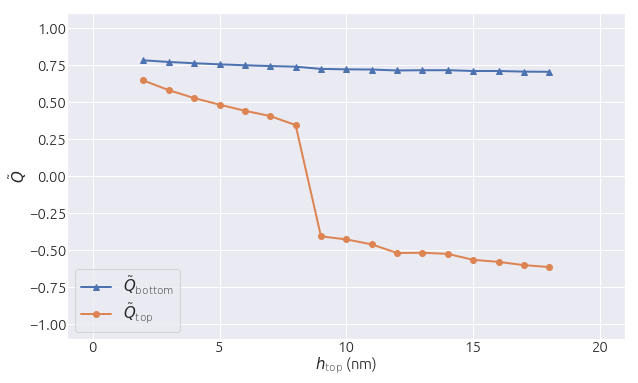

In [3]:
sns.set()
plt.style.use('./customstyle.mplstyle')

plt.figure(figsize=(10, 6))
plt.plot(ht_array, S_bottom, '^-', label=r'$\tilde{Q}_\mathrm{bottom}$')
plt.plot(ht_array, S_top, 'o-', label=r'$\tilde{Q}_\mathrm{top}$')
plt.xlabel(r"$h_\mathrm{top}$ (nm)")
plt.ylabel(r"$\tilde{Q}$")
plt.ylim([-1.1, 1.1])
plt.xlim([-1, 21])
plt.xticks([0, 5, 10, 15, 20])
plt.legend();